<div class="alert alert-success" role="alert">
  <h4 class="alert-heading">Bienvenue</h4>
    asdfasdfhave <i>any</i> asdfasdf
</div>

## Imports

In [225]:
# This is a comment
# First we import built-in libraries
import random                  
from fractions import Fraction   

# Then some 3rd party libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from music21 import chord, corpus, environment, meter, midi, note, stream, tempo

### MuseScore3 Windows

In [2]:
# Windows (adapt Program Files)
musescore_executable = r'C:\Program Files\MuseScore 3\bin\MuseScore3.exe'

environment.set('musescoreDirectPNGPath', musescore_executable)
environment.set('musicxmlPath', musescore_executable)
environment.set('autoDownload', 'allow')

### MuseScore3 Mac

In [3]:
# Mac path
musescore_executable = '/Applications/MuseScore 3.app/Contents/MacOS/mscore'

environment.set('musescoreDirectPNGPath', musescore_executable)
environment.set('musicxmlPath', musescore_executable)
environment.set('autoDownload', 'allow')

UserSettingsException: attempting to set a value to a path that does not exist: \Applications\MuseScore 3.app\Contents\MacOS\mscore

# Tools

In [278]:
# function to return key for any value
def getKeyFromValue(_dictionnary, _value):
    for key, value in _dictionnary.items():
         if _value == value:
             return key
 
    return None; #doesn't exist

# Play

In [3]:
def play(score):
    #Shortcut to play a stream
    midi.realtime.StreamPlayer(score).play();

# Notes

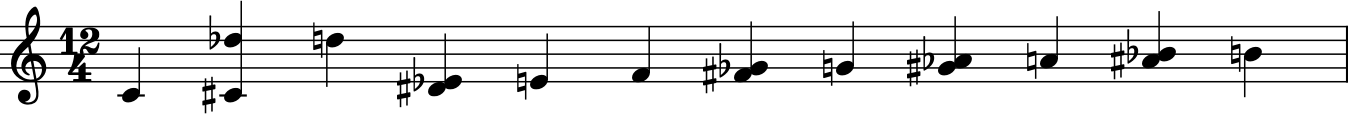

In [72]:
notes = [['C'], ['C#', 'Db5'], ['D5'], ['D#', 'Eb'], ['E'], ['F'], ['F#', 'Gb'], ['G'], ['G#','Ab'], ['A'], ['A#','Bb'], ['B']]
m = stream.Measure()
m.append([chord.Chord([note.Note(name) for name in pitch_class]) for pitch_class in notes]);

m.show();
play(m);

# Minor scale

In [73]:
n = note.Note(pitch = 57)

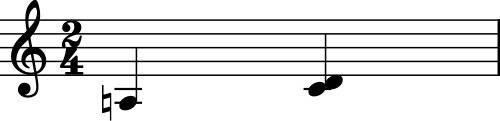

In [74]:
m = stream.Measure()
m.append(n)
m.append(chord.Chord([note.Note('C'), note.Note('D')]));
m.show()
play(m)

In [75]:
n = note.Note(pitch = 57)

## Scales / Chords

In [76]:
def isSameNoteWithoutOctave(note1, note2):
    
    if note1.pitch.name == note2.pitch.name: 
        return True;
    
    # To lose the octave information
    n1 = note.Note(pitch = note1.pitch.name);
    n2 = note.Note(pitch = note2.pitch.name);
    
    if n1.pitch.frequency == n2.pitch.frequency:
        return True;
    
    return False;

In [77]:
d = note.Note("D#3");
e = note.Note("Eb5");

print(isSameNoteWithoutOctave(d,e));

True


### Scale

In [289]:
# Scales interval dictionnary
scalesIntervalDictionnary = {
  "major": [0,2,4,5,7,9,11],
  "minor": [0,2,3,5,7,8,10],
  "dorian": [0,3,7] ##
}

# Scale
class Scale:
    
    # Constructor
    def __init__(self, _baseNote = note.Note('C4'), _interval = scalesIntervalDictionnary["major"]):
        self.baseNote = _baseNote;
        self.interval = _interval;
    
    # Transposes the base note (of i semi tones)
    def baseTranspose(self, i):
        return self.baseNote.transpose(i);
    
    # Gets the ith tone of the scale
    def getTone(self, i):
        return self.baseNote.transpose(self.interval[(i-1)%len(self.interval)]);
    
    def isToneOnScale(self, note):
        for i in range(len(self.interval)):
           # print(self.baseTranspose(self.interval[i]).name)
            if isSameNoteWithoutOctave(self.baseTranspose(self.interval[i]), note):
                return True;
        return False;
    
    # Show
    def show(self):
        m = stream.Measure();
        m.append([self.baseNote.transpose(i) for i in self.interval]);     
        m.append(self.baseNote.transpose(12));
        m.show();

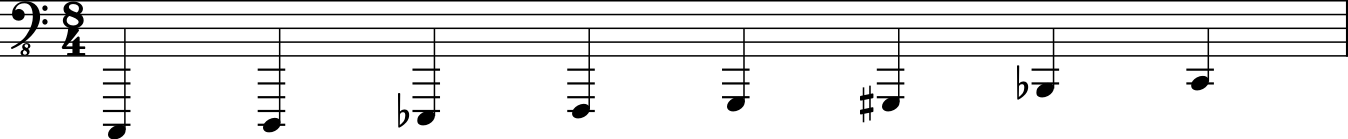

C
D
E-
True


In [79]:
s = Scale(note.Note('C0'), scalesIntervalDictionnary["minor"])
s.show()
print(s.isToneOnScale(note.Note('D#5')));

In [80]:
len(scalesIntervalDictionnary["major"])

7

### Chord

In [304]:
# Chords type dictionnary
chordsDictionnary = {
  "": [0,4,7],
  "5": [0,7],
  "m": [0,3,7],
  "7": [0,4,7,10],
  "m7": [0,3,7,10]
}

# Chord
class Chord:
    
    # Constructor
    def __init__(self, _baseNote, _scale):
        
        self.baseNote = _baseNote;
        self.interval = [0]; # 1th and 5th
        
        if _scale.isToneOnScale(_baseNote.transpose(3)) == True:
            self.interval.append(3);
        elif _scale.isToneOnScale(_baseNote.transpose(4)) == True:           
            self.interval.append(4);
            
        self.interval.append(7);
        
        
        
        
    # Define (like a constructor)
    def defineByType(self, _baseNote, _type = ""):       
        self.baseNote = _baseNote;
        self.interval = chordsDictionnary[_type];
        
        
   # def __init__(self, *args, **kwargs):   
   #     #args -- tuple of anonymous arguments
        #kwargs -- dictionary of named arguments
     #   print ('args: ', args, ' kwargs: ', kwargs);
        
     #   self.baseNote = kwargs["_baseNote"];
        
     #   if kwargs.get("_scale") != None:
            
        
      #  print(kwargs.get("michel3"))
     #   print(kwargs.keys())
            
    def baseTranspose(self, i):
        return self.baseNote.transpose(i);
    
    
    def getType(self):
        key = getKeyFromValue(chordsDictionnary, self.interval);
        if key != None:
            return key;
        return "Not in dictionnary";
    
    def getName(self):
        return self.baseNote.name + self.getType();
    
    # Major or minor chord
    #def isMajor(self):
        #if self.type.find("m") == -1:
       #     return True;
      #  return False;
    
    #def isMinor(self):
     #   return not self.isMajor();
    
    
    
    # only for scale ?
    #def getTone(self, i): # with i from 1 to 7.
        #minor = [0,2,3,5,7,8,10];
        #return self.baseTranspose(minor[(i-1)%7]);
        #return self.baseNote.transpose(self.scale.interval[(i-1)%7]);$
       # return note.Note(3)
    
    # Get notes
    def getNotesWithoutOctave(self):       
        n = [self.baseNote.transpose(i) for i in self.interval]; #
        return n;
    
    # Show
    def show(self):
        c = chord.Chord(self.getNotesWithoutOctave());
        c.show();
    
    
    
    
    
    
    

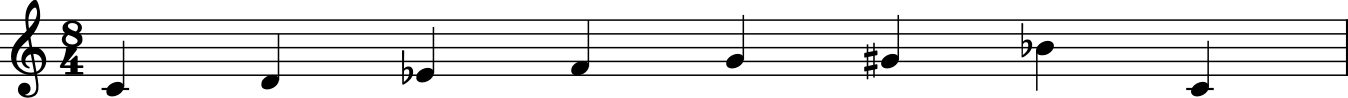

In [292]:
s = Scale(note.Note("C"), scalesIntervalDictionnary["minor"]);
s.show();

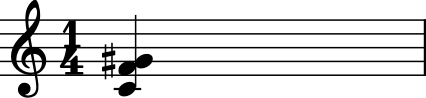

Fm
[0, 3, 7]
[<music21.note.Note F>, <music21.note.Note G#>, <music21.note.Note C>]


In [309]:
c = Chord(_baseNote = note.Note("F"), _scale = s);
c.show();
print(c.getName());
print(c.interval)
print(c.getNotesWithoutOctave())

## NotesRange

In [270]:
class NotesRange:
    
    # Constructor
    def __init__(self, _octaveNumber = 8):  
        
        self.range = {}; # Dictionnary
        for o in range(_octaveNumber):
            for i in range(0,12):
                n = note.Note(pitch = i);
                self.range[n.pitch.name + str(o)] = 0;   
        
        self.range["C" + str(o+1)] = 7; # highest C
                
                
    # Add chance/probability to notes (without octave) 
    def addChanceToNotesWithoutOctave(self, _notes = [], _probability = []):
        
        for key in self.range:
            for x in range(len(_notes)):
                if isSameNoteWithoutOctave(note.Note(key), _notes[x]) == True:
                    self.range[key] = self.range[key] + _probability[x];
        return;
    
    
    # Function from -1 to +1. Where function(-1) corresponds to the factor of the first note of the NotesRange
    def multiplyByFunction(self, _function):
              
        keysLength = len(self.range.keys());
        i = 0;
        for key in self.range.keys():      
            x = i/(keysLength-1)*2-1;
            #print(key + " " + str(x));
            self.range[key] *= _function(x);   
            i += 1;
    
    # Add another NotesRange
    def addNotesRange(self, _noteRange):
        for key in self.range.keys():      
            self.range[key] += _noteRange.range[key];   
            
        
    # Show 
    def show(self):
        print(self.range);
        
    # Show Plot
    def showPlot(self):
        keys = self.range.keys();
        values = self.range.values();
        plt.bar(keys, values);

{'C0': 0, 'C#0': 0, 'D0': 0, 'E-0': 0, 'E0': 0, 'F0': 0, 'F#0': 0, 'G0': 0, 'G#0': 0, 'A0': 0, 'B-0': 0, 'B0': 0, 'C1': 0, 'C#1': 0, 'D1': 0, 'E-1': 0, 'E1': 0, 'F1': 0, 'F#1': 0, 'G1': 0, 'G#1': 0, 'A1': 0, 'B-1': 0, 'B1': 0, 'C2': 0, 'C#2': 0, 'D2': 0, 'E-2': 0, 'E2': 0, 'F2': 0, 'F#2': 0, 'G2': 0, 'G#2': 0, 'A2': 0, 'B-2': 0, 'B2': 0, 'C3': 0, 'C#3': 0, 'D3': 0, 'E-3': 0, 'E3': 0, 'F3': 0, 'F#3': 0, 'G3': 0, 'G#3': 0, 'A3': 0, 'B-3': 0, 'B3': 0, 'C4': 0, 'C#4': 0, 'D4': 0, 'E-4': 0, 'E4': 0, 'F4': 0, 'F#4': 0, 'G4': 0, 'G#4': 0, 'A4': 0, 'B-4': 0, 'B4': 0, 'C5': 0, 'C#5': 0, 'D5': 0, 'E-5': 0, 'E5': 0, 'F5': 0, 'F#5': 0, 'G5': 0, 'G#5': 0, 'A5': 0, 'B-5': 0, 'B5': 0, 'C6': 0, 'C#6': 0, 'D6': 0, 'E-6': 0, 'E6': 0, 'F6': 0, 'F#6': 0, 'G6': 0, 'G#6': 0, 'A6': 0, 'B-6': 0, 'B6': 0, 'C7': 0, 'C#7': 0, 'D7': 0, 'E-7': 0, 'E7': 0, 'F7': 0, 'F#7': 0, 'G7': 0, 'G#7': 0, 'A7': 0, 'B-7': 0, 'B7': 0, 'C8': 7}
{'C0': 7, 'C#0': 0, 'D0': 0, 'E-0': 0, 'E0': 0, 'F0': 0, 'F#0': 0, 'G0': 0, 'G#0': 0, 

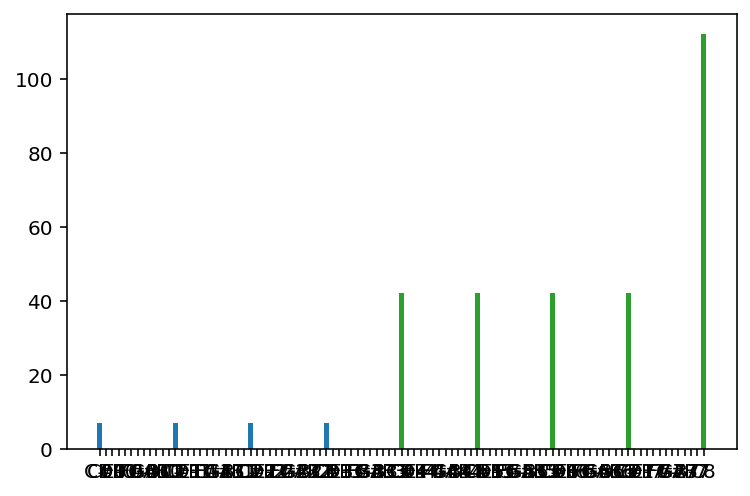

In [265]:



nr = NotesRange();
nr.show();

nr.addChanceToNotesWithoutOctave([note.Note("C"),note.Note("C")], [2,5]);
nr.show()


def ff(x): 
    if x < 0:
        return 0;
    if x == 1:
        return 4;
    return 3;

nr.showPlot();

nr.multiplyByFunction(ff);

nr.show();

nr.showPlot();

nr.addNotesRange(nr);

nr.show()

nr.showPlot()

In [84]:
#c = Chord("asdf",3,4, michel = 4)

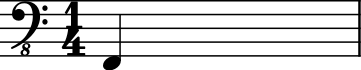

In [85]:
note.Note('A0').transpose(8).show()

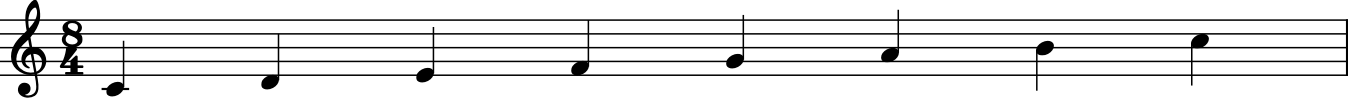

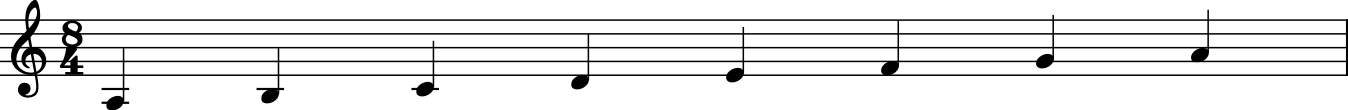

In [86]:
majorC = Scale(note.Note('C4'), scalesIntervalDictionnary["major"]);
minorA = Scale(note.Note('A3'), scalesIntervalDictionnary["minor"]);

majorC.show();
minorA.show();

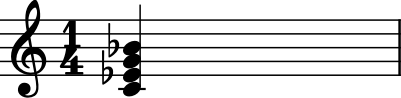

In [87]:
s = Chord(note.Note('C4'), "m7");
s.show();
#print(s.isMajor())
#print(s.isMinor())